In [1]:
import pandas as pd

In [2]:
import numpy  as np

In [3]:
from tensorflow.keras import layers,datasets,models

In [4]:
import matplotlib.pyplot as plt

In [5]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
x_test.shape

(10000, 32, 32, 3)

In [9]:
y_test.shape

(10000, 1)

In [10]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

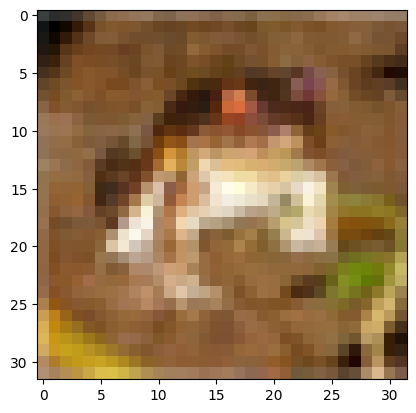

In [11]:
plt.imshow(x_train[0])

In [12]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [13]:
y_train[0]

array([6], dtype=uint8)

In [14]:
y_train[:4]

array([[6],
       [9],
       [9],
       [4]], dtype=uint8)

In [15]:
y_train=y_train.reshape(-1,)

In [16]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [17]:
def imageshow(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
    

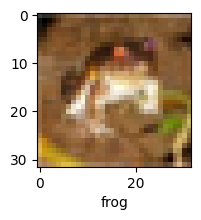

In [18]:
imageshow(x_train,y_train,0)

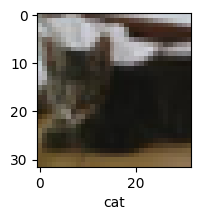

In [19]:
imageshow(x_train,y_train,9)

In [20]:
y_train[9]

3

In [26]:
def imagefind(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x_train[index])
    plt.xlabel(classes[y[index]])

TypeError: only integer scalar arrays can be converted to a scalar index

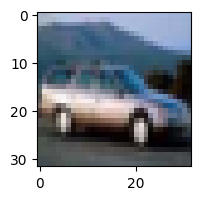

In [28]:
imagefind(x_test,y_test,4)

In [29]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [31]:
x_train[0].max()

255

In [32]:
x_train=x_train/255
x_test=x_test/255

In [33]:
x_train.shape

(50000, 32, 32, 3)

In [35]:
from tensorflow import keras

In [39]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)   

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.3042 - loss: 1.9301
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.4208 - loss: 1.6428
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.4494 - loss: 1.5571
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.4731 - loss: 1.4903
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.4986 - loss: 1.4371


In [40]:
ann.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4796 - loss: 1.4771


[1.4824986457824707, 0.47269999980926514]

In [42]:
ann_pred=ann.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [43]:
ann_pred[0]

array([0.03761644, 0.04369598, 0.10217129, 0.47469872, 0.02442974,
       0.12927407, 0.09026431, 0.00101256, 0.09176084, 0.00507606],
      dtype=float32)

In [44]:
import numpy as np

In [50]:
np.argmax(ann_pred[3])

8

In [51]:
classes[8]

'ship'

In [49]:
y_test[3]

array([0], dtype=uint8)

TypeError: only integer scalar arrays can be converted to a scalar index

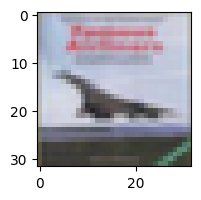

In [48]:
imageshow(x_test,y_test,3)

In [56]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\dharu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [57]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.3888 - loss: 1.6631
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6149 - loss: 1.1001
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6648 - loss: 0.9656
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6991 - loss: 0.8719
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7215 - loss: 0.8066
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7401 - loss: 0.7424
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7601 - loss: 0.6861
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7823 - loss: 0.6308
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7989 - loss: 0.5825
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8103 - loss: 0.5454


In [59]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [60]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6962 - loss: 0.9500


[0.9614216089248657, 0.6948000192642212]

In [119]:
import numpy as np

In [121]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[1.18791206e-04, 2.31247250e-05, 5.25233445e-05, 9.71938848e-01,
        6.30052964e-05, 2.26339176e-02, 4.80684591e-03, 2.01643397e-05,
        2.99953797e-04, 4.28854837e-05],
       [4.49371844e-04, 1.53884338e-02, 2.60581692e-06, 1.73145702e-06,
        9.32433353e-10, 2.44730791e-10, 2.54801513e-08, 2.21422491e-10,
        9.83693898e-01, 4.63979028e-04],
       [2.65392400e-02, 3.35097015e-01, 1.62036484e-03, 8.29619393e-02,
        6.06320845e-03, 1.26002580e-02, 5.67280164e-04, 9.62747540e-03,
        4.30181734e-02, 4.81904984e-01],
       [7.35513449e-01, 3.26107518e-04, 1.44305348e-03, 1.91096240e-03,
        2.85305735e-02, 2.37276072e-06, 1.33791694e-03, 9.88631473e-06,
        2.30038419e-01, 8.87336850e-04],
       [1.07341134e-06, 4.47947770e-07, 4.48450027e-03, 3.37216747e-03,
        6.15019679e-01, 2.98945728e-04, 3.76816541e-01, 3.88232684e-06,
        2.70269970e-06, 1.36150140e-08]], dtype=float32)

In [122]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 9, 0, 4]

In [123]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

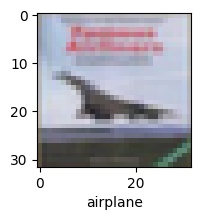

In [131]:
plot_sample(x_test, y_test,3)

In [132]:
classes[y_classes[3]]

'airplane'